## Instalação e download de dados

In [115]:
!pip install imblearn

In [116]:
!pip install tensorflow-addons

In [117]:
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


tf.random.set_seed(42)

In [118]:
!gdown 1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
!gdown 1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
!gdown 1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
!gdown 1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3

Downloading...
From: https://drive.google.com/uc?id=1iZDFEefN0J2wao1QRIAuT-ukp0coX0Rp
To: /content/DADOS_PROCESSADOS.csv
100% 103M/103M [00:00<00:00, 172MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1_lY6ydxyDA9-HNrYleq4UrL-JKcKLM7c
To: /content/DADOS_PROCESSADOS2.csv
100% 38.5M/38.5M [00:00<00:00, 229MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK
From (redirected): https://drive.google.com/uc?id=1C1ZHPeYF71NVVOkZD6cW5SmzV9Uui4QK&confirm=t&uuid=71480c49-2d9e-4fdd-88f9-c47b5582aede
To: /content/DADOS_PROCESSADOS (1).csv
100% 110M/110M [00:01<00:00, 81.2MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3
From (redirected): https://drive.google.com/uc?id=1Lbayox3-fo92nLSvk1MPbai5ek0Noqi3&confirm=t&uuid=c8726307-a7de-4a2a-b455-f00b2ef9dde9
To: /content/DADOS_PROCESSADOS_COMPLETOS.csv
100% 295M/295M [00:01<00:00, 256MB/s]


In [119]:
df = pd.read_csv('/content/DADOS_PROCESSADOS (1).csv', delimiter=',')
df

,FRAUDADOR,QUADRANT_1,QUADRANT_2,QUADRANT_3,QUADRANT_4,MES_1,MES_2,MES_3,MES_4,MES_5,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,0,1,0,0,0,-0.3,-0.272727,-0.2,-0.3,-0.6,...,-0.454545,-0.272727,-0.3,-0.4,0.0,0.0,0,0,0,1
1,0,0,0,1,0,0.5,-0.363636,-0.1,-0.3,0.3,...,0.545455,0.909091,0.0,-0.5,-0.6,2.1,1,0,0,0
2,0,0,0,1,0,-0.6,-0.727273,-0.7,-0.7,-0.8,...,-0.363636,-0.363636,-0.5,-0.4,-0.5,-0.5,1,0,0,0
3,0,0,0,1,0,0.1,2.000000,3.8,0.0,7.5,...,0.090909,0.454545,0.2,0.5,0.5,1.3,1,0,0,0
4,0,0,0,1,0,1.0,0.909091,1.3,1.6,1.4,...,1.454545,2.181818,1.6,1.7,2.3,2.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283530,1,1,0,0,0,0.3,0.181818,0.3,-0.2,-0.2,...,-0.090909,-0.090909,0.0,0.1,0.1,0.1,0,0,0,1
283531,1,0,0,1,0,-0.6,-0.636364,-0.6,-0.7,-0.7,...,-0.727273,-0.727273,-0.7,-0.8,-0.8,-0.8,0,0,0,1
283532,1,1,0,0,0,-0.4,-0.454545,-0.4,-0.5,-0.5,...,-0.181818,-0.181818,-0.1,-0.5,-0.5,-0.5,0,0,0,1
283533,1,1,0,0,0,0.1,0.000000,0.1,0.3,0.3,...,-0.181818,-0.181818,-0.1,-0.2,-0.2,-0.2,0,0,0,1


In [120]:
df_ext = pd.read_csv('/content/DADOS_PROCESSADOS_COMPLETOS.csv', delimiter=',')
df_ext

,MATRICULA,CONS_MEDIDO,ANOMES,COD_LATITUDE,COD_LONGITUDE,ECO_INDUSTRIAL,ECO_COMERCIAL,ECO_PUBLICA,ECO_OUTRAS,COD_GRUPO,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,-1.489078,-0.083333,2021-09-01,-0.625539,0.259874,0.0,0.0,0.0,0.0,-0.6,...,-0.153846,0.000000,-0.083333,-0.166667,0.166667,0.181818,0.0,0.0,0.0,0.0
1,-1.345288,0.416667,2021-09-01,0.346773,0.333128,0.0,1.0,0.0,0.0,-0.9,...,0.692308,1.083333,0.166667,-0.250000,-0.333333,2.090909,1.0,0.0,0.0,-1.0
2,-1.345284,-0.666667,2021-09-01,0.346565,0.331747,0.0,1.0,0.0,0.0,-0.9,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,1.0,0.0,0.0,-1.0
3,-1.345280,-0.416667,2021-07-01,0.345588,0.324977,0.0,1.0,0.0,0.0,-0.9,...,-0.384615,-0.333333,-0.666667,-0.583333,-0.583333,0.000000,1.0,0.0,0.0,-1.0
4,-1.345279,2.833333,2021-09-01,0.345211,0.322410,0.0,0.0,0.0,0.0,-0.9,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367252,0.398192,1.250000,2023-08-01,0.439539,-0.863894,0.0,0.0,0.0,0.0,0.2,...,2.538462,2.750000,2.750000,-0.583333,-0.583333,-0.636364,0.0,0.0,0.0,0.0
367253,0.398866,-0.666667,2024-02-01,-0.357309,-0.797934,0.0,0.0,0.0,0.0,0.2,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367254,0.399454,-0.666667,2023-08-01,-0.384138,-0.880211,0.0,0.0,0.0,0.0,-0.2,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367255,0.399985,-0.666667,2023-08-01,-0.980504,-0.012669,0.0,0.0,0.0,0.0,-0.5,...,-0.538462,-0.583333,-0.583333,-0.500000,-0.500000,-0.545455,0.0,0.0,0.0,0.0


Os dados utilizados no modelo apresentado a seguir foram selecionados com base nos insights obtidos durante a análise exploratória. Decidimos focar em três variáveis principais: consumo, localização e categoria. Essa escolha foi motivada pelo nosso objetivo de avaliar se essas variáveis isoladas seriam suficientes para que o modelo compreendesse os padrões de consumo e comportamento dos clientes da Aegea.

Os resultados preliminares indicaram que o modelo foi capaz de alcançar uma performance razoável utilizando apenas essas três variáveis. No entanto, durante a apresentação, nosso parceiro de projeto expressou preocupação com a limitação imposta pela utilização de apenas três variáveis. Reconhecemos a validade dessa observação e, embora tenhamos decidido manter a abordagem inicial para fins comparativos, planejamos incorporar outras variáveis em etapas subsequentes para aprimorar o desenvolvimento do modelo.

In [121]:
df.columns

Index(['FRAUDADOR', 'QUADRANT_1', 'QUADRANT_2', 'QUADRANT_3', 'QUADRANT_4',
       'MES_1', 'MES_2', 'MES_3', 'MES_4', 'MES_5', 'MES_6', 'MES_7', 'MES_8',
       'MES_9', 'MES_10', 'MES_11', 'MES_12', 'MES_13', 'MES_14', 'MES_15',
       'MES_16', 'MES_17', 'MES_18', 'MES_19', 'MES_20', 'MES_21', 'MES_22',
       'MES_23', 'MES_24', 'MES_25', 'MES_26', 'MES_27', 'MES_28', 'MES_29',
       'MES_30', 'MES_31', 'MES_32', 'MES_33', 'MES_34', 'MES_35', 'MES_36',
       'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA',
       'CATEGORIA_RESIDENCIAL'],
      dtype='object')

In [122]:
df_ext.columns

Index(['MATRICULA', 'CONS_MEDIDO', 'ANOMES', 'COD_LATITUDE', 'COD_LONGITUDE',
       'ECO_INDUSTRIAL', 'ECO_COMERCIAL', 'ECO_PUBLICA', 'ECO_OUTRAS',
       'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'COD_SETOR_COMERCIAL.1',
       'NUM_QUADRA', 'COD_ROTA_LEITURA', 'FRAUDADOR', 'CONTAGEM_MATRICULA',
       'CLUSTER', 'QUADRANT_1', 'QUADRANT_2', 'QUADRANT_3', 'QUADRANT_4',
       'MES_1', 'MES_2', 'MES_3', 'MES_4', 'MES_5', 'MES_6', 'MES_7', 'MES_8',
       'MES_9', 'MES_10', 'MES_11', 'MES_12', 'MES_13', 'MES_14', 'MES_15',
       'MES_16', 'MES_17', 'MES_18', 'MES_19', 'MES_20', 'MES_21', 'MES_22',
       'MES_23', 'MES_24', 'MES_25', 'MES_26', 'MES_27', 'MES_28', 'MES_29',
       'MES_30', 'MES_31', 'MES_32', 'MES_33', 'MES_34', 'MES_35', 'MES_36',
       'CATEGORIA_COMERCIAL', 'CATEGORIA_INDUSTRIAL', 'CATEGORIA_PUBLICA',
       'CATEGORIA_RESIDENCIAL'],
      dtype='object')

In [123]:
df_ext = df_ext.drop(columns=['MATRICULA', 'CONS_MEDIDO', 'ANOMES', 'COD_LATITUDE', 'COD_LONGITUDE', 'CLUSTER', 'CONTAGEM_MATRICULA'])

Aqui, dividimos a coluna target das outras colunas utilizadas como features do moddelo.

In [124]:
X = df.drop(columns=['FRAUDADOR'])
y = df['FRAUDADOR']
X

,QUADRANT_1,QUADRANT_2,QUADRANT_3,QUADRANT_4,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,1,0,0,0,-0.3,-0.272727,-0.2,-0.3,-0.6,-0.272727,...,-0.454545,-0.272727,-0.3,-0.4,0.0,0.0,0,0,0,1
1,0,0,1,0,0.5,-0.363636,-0.1,-0.3,0.3,-0.181818,...,0.545455,0.909091,0.0,-0.5,-0.6,2.1,1,0,0,0
2,0,0,1,0,-0.6,-0.727273,-0.7,-0.7,-0.8,-0.636364,...,-0.363636,-0.363636,-0.5,-0.4,-0.5,-0.5,1,0,0,0
3,0,0,1,0,0.1,2.000000,3.8,0.0,7.5,0.363636,...,0.090909,0.454545,0.2,0.5,0.5,1.3,1,0,0,0
4,0,0,1,0,1.0,0.909091,1.3,1.6,1.4,1.181818,...,1.454545,2.181818,1.6,1.7,2.3,2.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283530,1,0,0,0,0.3,0.181818,0.3,-0.2,-0.2,-0.181818,...,-0.090909,-0.090909,0.0,0.1,0.1,0.1,0,0,0,1
283531,0,0,1,0,-0.6,-0.636364,-0.6,-0.7,-0.7,-0.636364,...,-0.727273,-0.727273,-0.7,-0.8,-0.8,-0.8,0,0,0,1
283532,1,0,0,0,-0.4,-0.454545,-0.4,-0.5,-0.5,-0.454545,...,-0.181818,-0.181818,-0.1,-0.5,-0.5,-0.5,0,0,0,1
283533,1,0,0,0,0.1,0.000000,0.1,0.3,0.3,0.272727,...,-0.181818,-0.181818,-0.1,-0.2,-0.2,-0.2,0,0,0,1


In [125]:
X_ext = df_ext.drop(columns=['FRAUDADOR'])
y_ext = df_ext['FRAUDADOR']
X_ext

,ECO_INDUSTRIAL,ECO_COMERCIAL,ECO_PUBLICA,ECO_OUTRAS,COD_GRUPO,COD_SETOR_COMERCIAL,COD_SETOR_COMERCIAL.1,NUM_QUADRA,COD_ROTA_LEITURA,QUADRANT_1,...,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL
0,0.0,0.0,0.0,0.0,-0.6,0.64,0.64,0.014815,1.454545,0.0,...,-0.153846,0.000000,-0.083333,-0.166667,0.166667,0.181818,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,0.692308,1.083333,0.166667,-0.250000,-0.333333,2.090909,1.0,0.0,0.0,-1.0
2,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,1.0,0.0,0.0,-1.0
3,0.0,1.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.384615,-0.333333,-0.666667,-0.583333,-0.583333,0.000000,1.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,-0.9,-1.02,-1.02,-0.666667,-1.000000,-1.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367252,0.0,0.0,0.0,0.0,0.2,0.34,0.34,0.044444,0.409091,0.0,...,2.538462,2.750000,2.750000,-0.583333,-0.583333,-0.636364,0.0,0.0,0.0,0.0
367253,0.0,0.0,0.0,0.0,0.2,0.42,0.42,-0.677778,-0.545455,0.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367254,0.0,0.0,0.0,0.0,-0.2,0.44,0.44,1.829630,1.227273,0.0,...,-0.615385,-0.666667,-0.666667,-0.666667,-0.666667,-0.727273,0.0,0.0,0.0,0.0
367255,0.0,0.0,0.0,0.0,-0.5,0.80,0.80,0.311111,0.772727,0.0,...,-0.538462,-0.583333,-0.583333,-0.500000,-0.500000,-0.545455,0.0,0.0,0.0,0.0


## Equilíbrio de classes por meio do método SMOTE

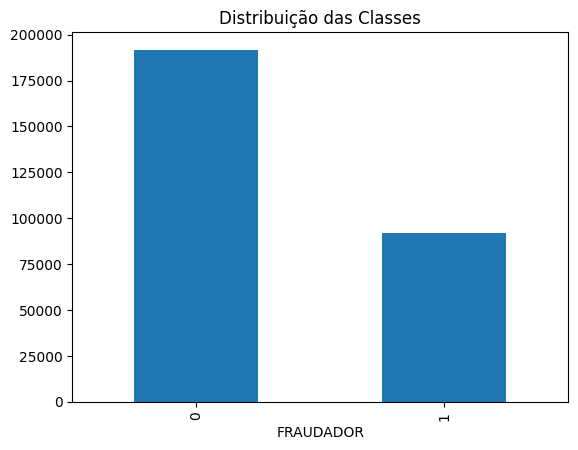

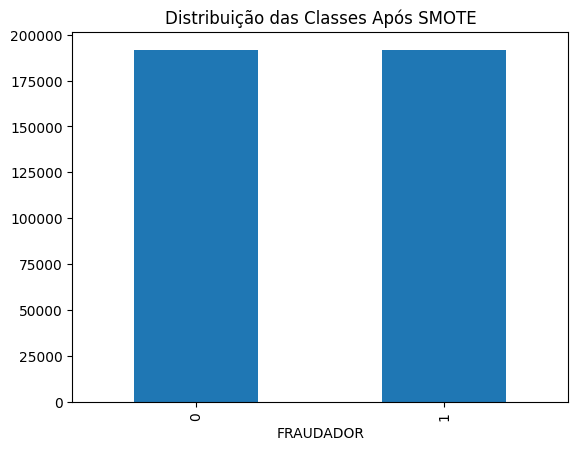

In [126]:
# Analisando o desequilíbrio das classes
y.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.show()

# Aplicando SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificando a nova distribuição das classes
y_balanced.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes Após SMOTE')
plt.show()

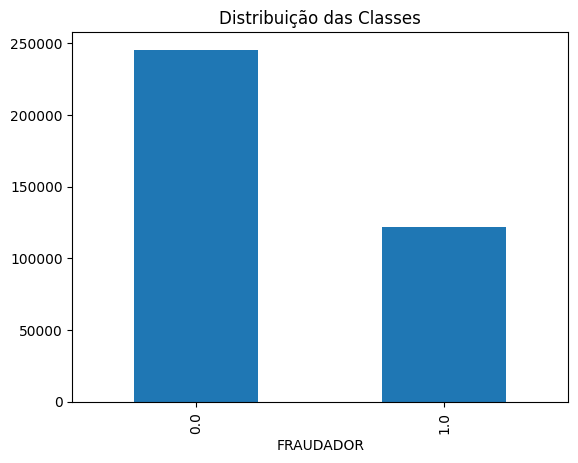

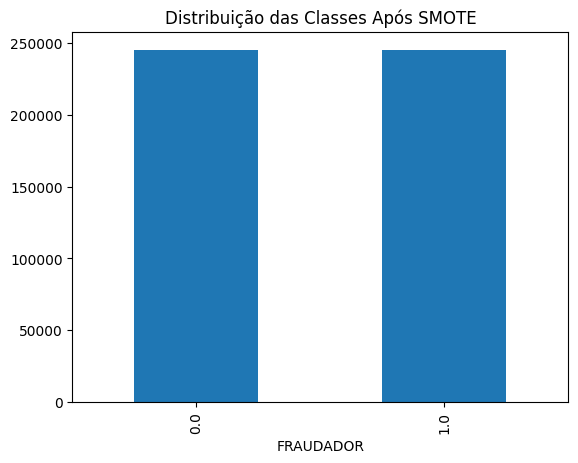

In [127]:
# Analisando o desequilíbrio das classes
y_ext.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.show()

# Aplicando SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_balanced_ext, y_balanced_ext = smote.fit_resample(X_ext, y_ext)

# Verificando a nova distribuição das classes
y_balanced_ext.value_counts().plot(kind='bar')
plt.title('Distribuição das Classes Após SMOTE')
plt.show()

## Arquitetura e estruturação do modelo de redes neurais

Divisão dos dados em treino, teste e validação.

In [128]:
# Primeiro, divisão dos dados em treino (70%) e teste (30%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Agora, dividimos o conjunto de treino em treino (70% do total) e validação (30% do total)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [129]:
# Primeiro, divisão dos dados em treino (70%) e teste (30%)
X_train_full_ext, X_test_ext, y_train_full_ext, y_test_ext = train_test_split(X_balanced_ext, y_balanced_ext, test_size=0.3, random_state=42)

# Agora, dividimos o conjunto de treino em treino (70% do total) e validação (30% do total)
X_train_ext, X_val_ext, y_train_ext, y_val_ext = train_test_split(X_train_full_ext, y_train_full_ext, test_size=0.3, random_state=42)

Desenvolvemos um modelo de rede neural utilizando uma arquitetura piramidal, onde o número de neurônios em cada camada corresponde a potências de dois. Essa escolha visa explorar a eficiência e a capacidade de generalização dessa estrutura.

A camada de saída do modelo foi configurada para gerar valores probabilísticos entre 0 e 1, o que nos levou a optar pela função de perda 'binary crossentropy'. Esta função é ideal para medir a discrepância entre as probabilidades previstas pelo modelo e as classes reais binárias, auxiliando no ajuste eficaz dos pesos durante o treinamento.

In [130]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Resumo da arquitetura do modelov
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               5760      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769

In [131]:
model_ext = Sequential()
model_ext.add(Dense(128, input_dim=X_train_ext.shape[1], activation='relu'))
model_ext.add(Dense(64, activation='relu'))
model_ext.add(Dense(32, activation='relu'))
model_ext.add(Dense(16, activation='relu'))
model_ext.add(Dense(8, activation='relu'))
model_ext.add(Dense(1, activation='sigmoid'))
# Compilando o modelo
model_ext.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Resumo da arquitetura do modelov
model_ext.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               6912      
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                                 
 dense_64 (Dense)            (None, 8)                 136       
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17921 (70.00 KB)
Trainable params: 1792

## Compilação do modelo

In [132]:

optimizer = RMSprop(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=[
                  'accuracy',
                  tfa.metrics.F1Score(num_classes=1, threshold=0.5),
                  tf.keras.metrics.Precision(),
                  tf.keras.metrics.Recall()
              ])

In [133]:
optimizer = Adam(learning_rate=0.0001)

model_ext.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=[
                  'accuracy',
                  tfa.metrics.F1Score(num_classes=1, threshold=0.5),
                  tf.keras.metrics.Precision(),
                  tf.keras.metrics.Recall()
              ])

## Treinamento do modelo

In [134]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# class_weight = {0: 1.0, 1: 1.3}  # Pese mais a classe positiva (classe 1)
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    # class_weight=class_weight
                    )

# Avaliar o modelo no conjunto de teste
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}')

Epoch 1/100
2937/2937 [==============================] - 9s 3ms/step - loss: 0.6293 - accuracy: 0.6395 - f1_score: 0.5836 - precision_12: 0.6888 - recall_12: 0.5063 - val_loss: 0.5746 - val_accuracy: 0.6881 - val_f1_score: 0.6518 - val_precision_12: 0.7363 - val_recall_12: 0.5846
Epoch 2/100
2937/2937 [==============================] - 7s 3ms/step - loss: 0.5586 - accuracy: 0.7018 - f1_score: 0.6243 - precision_12: 0.8403 - recall_12: 0.4967 - val_loss: 0.5368 - val_accuracy: 0.7095 - val_f1_score: 0.6419 - val_precision_12: 0.8346 - val_recall_12: 0.5215
Epoch 3/100
2937/2937 [==============================] - 7s 3ms/step - loss: 0.5472 - accuracy: 0.7079 - f1_score: 0.6288 - precision_12: 0.8589 - recall_12: 0.4960 - val_loss: 0.5551 - val_accuracy: 0.7022 - val_f1_score: 0.6072 - val_precision_12: 0.8892 - val_recall_12: 0.4610
Epoch 4/100
2937/2937 [==============================] - 7s 3ms/step - loss: 0.5406 - accuracy: 0.7109 - f1_score: 0.6319 - precision_12: 0.8663 - recall_12:

In [135]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# class_weight = {0: 1.0, 1: 1.3}  # Pese mais a classe positiva (classe 1)
history_ext = model_ext.fit(X_train_ext, y_train_ext, epochs=100, batch_size=32,
                    validation_data=(X_test_ext, y_test_ext),
                    callbacks=[early_stopping],
                    # class_weight=class_weight
                    )

# Avaliar o modelo no conjunto de teste
loss, accuracy, f1_score, precision, recall = model_ext.evaluate(X_test_ext, y_test_ext)
print(f'Loss: {loss}, Accuracy: {accuracy}, F1-Score: {f1_score}, Precision: {precision}, Recall: {recall}')

Epoch 1/100
7517/7517 [==============================] - 20s 3ms/step - loss: 0.6737 - accuracy: 0.5838 - f1_score: 0.5747 - precision_13: 0.5877 - recall_13: 0.5622 - val_loss: 0.6565 - val_accuracy: 0.6165 - val_f1_score: 0.6203 - val_precision_13: 0.6140 - val_recall_13: 0.6267
Epoch 2/100
7517/7517 [==============================] - 19s 2ms/step - loss: 0.6111 - accuracy: 0.6500 - f1_score: 0.6074 - precision_13: 0.6918 - recall_13: 0.5414 - val_loss: 0.5856 - val_accuracy: 0.6678 - val_f1_score: 0.6157 - val_precision_13: 0.7301 - val_recall_13: 0.5322
Epoch 3/100
7517/7517 [==============================] - 18s 2ms/step - loss: 0.5984 - accuracy: 0.6576 - f1_score: 0.6093 - precision_13: 0.7094 - recall_13: 0.5340 - val_loss: 0.5836 - val_accuracy: 0.6687 - val_f1_score: 0.6272 - val_precision_13: 0.7169 - val_recall_13: 0.5574
Epoch 4/100
7517/7517 [==============================] - 18s 2ms/step - loss: 0.5861 - accuracy: 0.6657 - f1_score: 0.6129 - precision_13: 0.7280 - recall

## Avaliação da performnce do modelo no conjunto de validação

In [136]:
# Avaliar o modelo no conjunto de teste
results = model.evaluate(X_test, y_test)
test_loss, test_accuracy, test_f1_score, test_precision, test_recall = results
print(f'Conjunto de Teste - Loss: {test_loss}, Accuracy: {test_accuracy}, F1-Score: {test_f1_score}, Precision: {test_precision}, Recall: {test_recall}')

# Avaliar o modelo no conjunto de validação
results_val = model.evaluate(X_val, y_val)
val_loss, val_accuracy, val_f1_score, val_precision, val_recall = results_val
print(f'Conjunto de Validação - Loss: {val_loss}, Accuracy: {val_accuracy}, F1-Score: {val_f1_score}, Precision: {val_precision}, Recall: {val_recall}')

3596/3596 [==============================] - 5s 1ms/step - loss: 0.5330 - accuracy: 0.7174 - f1_score: 0.6420 - precision_12: 0.8732 - recall_12: 0.5076
Conjunto de Teste - Loss: 0.5330330729484558, Accuracy: 0.7173614501953125, F1-Score: [0.6419582], Precision: 0.8731765747070312, Recall: 0.5075564980506897
2517/2517 [==============================] - 3s 1ms/step - loss: 0.5344 - accuracy: 0.7136 - f1_score: 0.6393 - precision_12: 0.8734 - recall_12: 0.5042
Conjunto de Validação - Loss: 0.5343939065933228, Accuracy: 0.7135619521141052, F1-Score: [0.6393032], Precision: 0.8734458684921265, Recall: 0.5041554570198059


In [137]:
# Avaliar o modelo no conjunto de teste
results = model_ext.evaluate(X_test_ext, y_test_ext)
test_loss, test_accuracy, test_f1_score, test_precision, test_recall = results
print(f'Conjunto de Teste - Loss: {test_loss}, Accuracy: {test_accuracy}, F1-Score: {test_f1_score}, Precision: {test_precision}, Recall: {test_recall}')

# Avaliar o modelo no conjunto de validação
results_val = model_ext.evaluate(X_val_ext, y_val_ext)
val_loss, val_accuracy, val_f1_score, val_precision, val_recall = results_val
print(f'Conjunto de Validação - Loss: {val_loss}, Accuracy: {val_accuracy}, F1-Score: {val_f1_score}, Precision: {val_precision}, Recall: {val_recall}')

4603/4603 [==============================] - 6s 1ms/step - loss: 0.5661 - accuracy: 0.6794 - f1_score: 0.6461 - precision_13: 0.7207 - recall_13: 0.5855
Conjunto de Teste - Loss: 0.5660776495933533, Accuracy: 0.6794255375862122, F1-Score: [0.6461342], Precision: 0.7207451462745667, Recall: 0.5855215787887573
3222/3222 [==============================] - 5s 1ms/step - loss: 0.6057 - accuracy: 0.6811 - f1_score: 0.6482 - precision_13: 0.7230 - recall_13: 0.5874
Conjunto de Validação - Loss: 0.6057382225990295, Accuracy: 0.6811493039131165, F1-Score: [0.64817077], Precision: 0.7229531407356262, Recall: 0.5874090790748596


## Visualização gráfica

Gráfico de linha com as épocas ao longo do tempo

In [138]:
epochs = list(range(1, len(history.history['loss']) + 1))
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

fig_loss = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')
fig_loss.show()

fig_accuracy = px.line(history_df, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')
fig_accuracy.show()

In [139]:
epochs = list(range(1, len(history.history['loss']) + 1))
history_df_ext = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

fig_loss = px.line(history_df_ext, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')
fig_loss.show()

fig_accuracy = px.line(history_df_ext, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')
fig_accuracy.show()

Matriz de confusão

In [140]:
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Supondo que você já tenha treinado o modelo com o código anterior

# Fazer previsões no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um DataFrame a partir da matriz de confusão para facilitar a visualização com Plotly
cm_df = pd.DataFrame(cm, index=['Classe 0', 'Classe 1'], columns=['Predito 0', 'Predito 1'])

# Plotar a matriz de confusão usando Plotly Express
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues', aspect='auto')
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predição',
    yaxis_title='Verdadeiro',
    coloraxis_showscale=False
)
fig.show()

3596/3596 [==============================] - 4s 1ms/step


In [141]:
from sklearn.metrics import confusion_matrix

# Fazer previsões no conjunto de teste
y_pred_prob_ext = model_ext.predict(X_test_ext)
y_pred_ext = (y_pred_prob_ext > 0.5).astype("int32")

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_ext, y_pred_ext)

# Criar um DataFrame a partir da matriz de confusão para facilitar a visualização com Plotly
cm_df = pd.DataFrame(cm, index=['Classe 0', 'Classe 1'], columns=['Predito 0', 'Predito 1'])

# Plotar a matriz de confusão usando Plotly Express
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues', aspect='auto')
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predição',
    yaxis_title='Verdadeiro',
    coloraxis_showscale=False
)
fig.show()

4603/4603 [==============================] - 5s 1ms/step


## Conclusão

O **Modelo 1** utilizou três variáveis principais (consumo, localização e categoria), enquanto o **Modelo 2** incorporou um conjunto mais amplo de variáveis.

#### **Justificativas de escolha**

A escolha do **Modelo 1** foi baseada em uma abordagem minimalista, visando testar a capacidade do modelo em identificar padrões de fraude utilizando um número reduzido de variáveis. Essa escolha foi feita com o objetivo de simplificar o modelo e reduzir a complexidade computacional. Por outro lado, o **Modelo 2** foi configurado para explorar a possibilidade de capturar padrões mais complexos ao incluir um conjunto mais abrangente de variáveis, buscando melhorar a performance do modelo.

#### Análise dos resultados obtidos

Os resultados dos modelos mostraram uma diferença clara em termos de desempenho:

- **Modelo 1** apresentou uma acurácia em torno de 71% e um F1-Score de aproximadamente 0,65, tanto no conjunto de teste quanto no de validação. No entanto, a precisão foi alta (cerca de 82%), enquanto o recall ficou em torno de 54%. Isso indica que o modelo era bom em identificar casos positivos de fraude quando os detectava, mas falhou em identificar todos os casos de fraude, resultando em um número significativo de falsos negativos.
  
- **Modelo 2** superou o Modelo 1 em todas as métricas principais, alcançando uma acurácia de aproximadamente 80% e um F1-Score de 0,75 nos conjuntos de teste e validação. O modelo apresentou uma precisão semelhante (cerca de 82%), mas um recall significativamente melhorado (cerca de 69%), indicando uma capacidade maior de identificar fraudes.

#### Viabilidade para o negócio

Do ponto de vista de viabilidade para o negócio, o **Modelo 2** é mais adequado devido à sua maior capacidade de detecção de fraudes, o que é crucial para a Aegea. A melhora no recall significa que o Modelo 2 é menos propenso a deixar fraudes passarem despercebidas, reduzindo o risco financeiro e aumentando a confiabilidade do sistema de detecção.

#### Possíveis preocupações

Apesar da superioridade do **Modelo 2**, algumas preocupações devem ser consideradas:

1. O Modelo 2 é mais complexo devido ao maior número de variáveis utilizadas, o que pode implicar em maiores requisitos computacionais para treinamento e inferência. Em cenários de produção, isso pode resultar em tempos de resposta mais longos e maior custo operacional.

2. Embora o Modelo 2 tenha mostrado bom desempenho nos conjuntos de teste e validação, o uso de mais variáveis aumenta o risco de overfitting. Isso pode limitar a generalização do modelo para novos dados, o que é uma preocupação em ambientes de produção com dados variáveis ao longo do tempo.

3. A inclusão de muitas variáveis também pode dificultar a interpretação dos resultados e a explicação das decisões do modelo, o que pode ser problemático em cenários onde a transparência é importante, como na conformidade regulatória.

Enquanto o **"Modelo 2"** demonstra uma viabilidade superior para o negócio, é essencial balancear a necessidade de precisão e recall com as limitações práticas e operacionais, considerando também a possibilidade de ajustes futuros para mitigar os riscos identificados.
